# Delivery company: Neural Networks Regression

# 0.0 Problem Definition

Delivery company works with a wide range of restaurants for delivering their items directly to the people.    

Delivery company has a number of delivery partners available for delivering the food, from various restaurants
and wants to get an estimated delivery time that it can provide the customers on the basis of what
they are ordering, from where and also the delivery partners.

## 0.1 Data Problem

Here we need to build a  regression model that will do delivery time estimation, based on all those features in data provided. Since this we a continuous value we need to use regression model for doing prediction. We will build model using neural networks

## 0.2 Column Profile

1. market_id : integer id for the market where the restaurant lies
2. created_at : the timestamp at which the order was placed
3. actual_delivery_time : the timestamp when the order was delivered
4. store_primary_category : category for the restaurant
5. order_protocol : integer code value for order protocol(how the order was placed ie: through
Delivery company, call to restaurant, pre booked, third part etc)
6. total_items subtotal : final price of the order
7. num_distinct_items : the number of distinct items in the order
8. min_item_price : price of the cheapest item in the order
9. max_item_price : price of the costliest item in order
10.total_onshift_partners : number of delivery partners on duty at the time order was placed
11.total_busy_partners : number of delivery partners attending to other tasks
12.total_outstanding_orders : total number of orders to be fulfilled at the moment

## 0.3 Data download

In [ ]:
!wget \
https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/015/039/original/dataset.csv.zip?1663710760 \
    -O data.csv.zip

--2023-07-19 21:14:03--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/015/039/original/dataset.csv.zip?1663710760
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 2600:9000:2149:6800:11:1aff:4b00:21, 2600:9000:2149:e800:11:1aff:4b00:21, 2600:9000:2149:7c00:11:1aff:4b00:21, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|2600:9000:2149:6800:11:1aff:4b00:21|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5174841 (4.9M) [application/zip]
Saving to: ‘data.csv.zip’

data.csv.zip        100%[===================>]   4.93M  3.57MB/s    in 1.4s    

2023-07-19 21:14:04 (3.57 MB/s) - ‘data.csv.zip’ saved [5174841/5174841]



# 1.0 Exploratory Data analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd '/content/drive/MyDrive/scaler'

/content/drive/MyDrive/scaler


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.preprocessing import LabelEncoder
import sklearn.metrics as met

pd.set_option('display.max_columns', 500)
pd.set_option('display.float', '{:.2f}'.format)

In [ ]:
df = pd.read_csv('data.csv.zip',compression='zip')

In [ ]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.00,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.00,4,3441,4,557,1239,33.00,14.00,21.00
1,2.00,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.00,1,1900,1,1400,1400,1.00,2.00,2.00
2,3.00,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.00,1,1900,1,1900,1900,1.00,0.00,0.00
3,3.00,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.00,6,6900,5,600,1800,1.00,1.00,2.00
4,3.00,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.00,3,3900,3,1100,1600,6.00,6.00,9.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

- dataset has 1,97,428 rows and 14 columns   
- dataset has 4 object types, 10 numeric columns
- nulls present in some columns  

In [ ]:
df.nunique()

market_id                        6
created_at                  180985
actual_delivery_time        178110
store_id                      6743
store_primary_category          74
order_protocol                   7
total_items                     57
subtotal                      8368
num_distinct_items              20
min_item_price                2312
max_item_price                2652
total_onshift_partners         172
total_busy_partners            159
total_outstanding_orders       281
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
market_id,196441.00,2.98,1.52,1.00,2.00,3.00,4.00,6.00
order_protocol,196433.00,2.88,1.50,1.00,1.00,3.00,4.00,7.00
total_items,197428.00,3.20,2.67,1.00,2.00,3.00,4.00,411.00
subtotal,197428.00,2682.33,1823.09,0.00,1400.00,2200.00,3395.00,27100.00
num_distinct_items,197428.00,2.67,1.63,1.00,1.00,2.00,3.00,20.00
min_item_price,197428.00,686.22,522.04,-86.00,299.00,595.00,949.00,14700.00
max_item_price,197428.00,1159.59,558.41,0.00,800.00,1095.00,1395.00,14700.00
total_onshift_partners,181166.00,44.81,34.53,-4.00,17.00,37.00,65.00,171.00
total_busy_partners,181166.00,41.74,32.15,-5.00,15.00,34.00,62.00,154.00
total_outstanding_orders,181166.00,58.05,52.66,-6.00,17.00,41.00,85.00,285.00


In [ ]:
df.describe(include='object')

,created_at,actual_delivery_time,store_id,store_primary_category
count,197428,197421,197428,192668
unique,180985,178110,6743,74
top,2015-02-11 19:50:43,2015-02-11 20:40:45,d43ab110ab2489d6b9b2caa394bf920f,american
freq,6,5,937,19399


# 2.0 Data Preprocessing

## 2.1 check for Missing value

In [ ]:
# percentage of missing values in each column
round(100 * (df.isnull().sum()/len(df)),2).sort_values(ascending=False)

total_onshift_partners     8.24
total_busy_partners        8.24
total_outstanding_orders   8.24
store_primary_category     2.41
market_id                  0.50
order_protocol             0.50
created_at                 0.00
actual_delivery_time       0.00
store_id                   0.00
total_items                0.00
subtotal                   0.00
num_distinct_items         0.00
min_item_price             0.00
max_item_price             0.00
dtype: float64

In [ ]:
#replace missing values with median to avoid outlier effect
df['total_onshift_partners'] = df['total_onshift_partners'].fillna(df['total_onshift_partners'].median())
df['total_busy_partners'] = df['total_busy_partners'].fillna(df['total_onshift_partners'].median())
df['total_outstanding_orders'] = df['total_outstanding_orders'].fillna(df['total_onshift_partners'].median())

#replace missing values with mode
df['store_primary_category'] = df['store_primary_category'].fillna(df['store_primary_category'].mode()[0])
df['market_id'] = df['market_id'].fillna(df['market_id'].mode()[0])
df['order_protocol'] = df['order_protocol'].fillna(df['order_protocol'].mode()[0])

In [ ]:
# percentage of missing values in each column
round(100 * (df.isnull().sum()/len(df)),2).sort_values(ascending=False)

market_id                  0.00
created_at                 0.00
actual_delivery_time       0.00
store_id                   0.00
store_primary_category     0.00
order_protocol             0.00
total_items                0.00
subtotal                   0.00
num_distinct_items         0.00
min_item_price             0.00
max_item_price             0.00
total_onshift_partners     0.00
total_busy_partners        0.00
total_outstanding_orders   0.00
dtype: float64

- All nulls are eliminated

## 2.3 Feature Engineering

- **datetime** object represents a specific date and time  
- **timedelta** object represents a duration, or   difference between two dates or time   
- **time span** is a period of time between two dates or time. it is represented using  datetime  or timedelta object

Some datetime functions are :
 - pd.to_datetime(): convert stringto datetime  
 - dt.hour : return hour component of datetime   
 - dt.day_name(): returns the name of the weekday for  given date

In [ ]:
##  convert object type to datetime
df['created_at']= pd.to_datetime(df['created_at'])
df['actual_delivery_time']= pd.to_datetime(df['actual_delivery_time'])

##  convert object type to string
df['store_id'] = df['store_id'].astype('string')
df['store_primary_category'] = df['store_primary_category'].astype('string')

### 2.3.1 Create target column (time taken for delivery)

In [ ]:
#compute diff b/n delivery_time,created_at. convert it into minutes
df['delivery_time']= (df['actual_delivery_time']-df['created_at']).dt.total_seconds()/60

### 2.3.2 Getting hour of day from the order time and also the day of the week

In [ ]:
#https://www.easytweaks.com/get-time-only-pandas-datetime/
df['create_hr']= df['created_at'].dt.hour

#https://stackoverflow.com/questions/30222533/create-a-day-of-week-column-in-a-pandas-dataframe-using-python
df['day_of_week'] = df['created_at'].dt.day_name()

#  3.0 Data visualization and cleaning

## 3.1 Univariate Analysis

###   3.1.1 Numeric Features

In [ ]:
def plotcol(df,col):
    '''
    function to plot histogram,box plot for column
    '''
    fig, ax = plt.subplots(1,2, figsize=(10, 6))
    sns.histplot(data=df,x=col,kde='True',ax=ax[0])
    sns.boxplot(data=df,y=col,width=0.2,ax=ax[1])
    plt.subplots_adjust(wspace=0.3)
    plt.show()

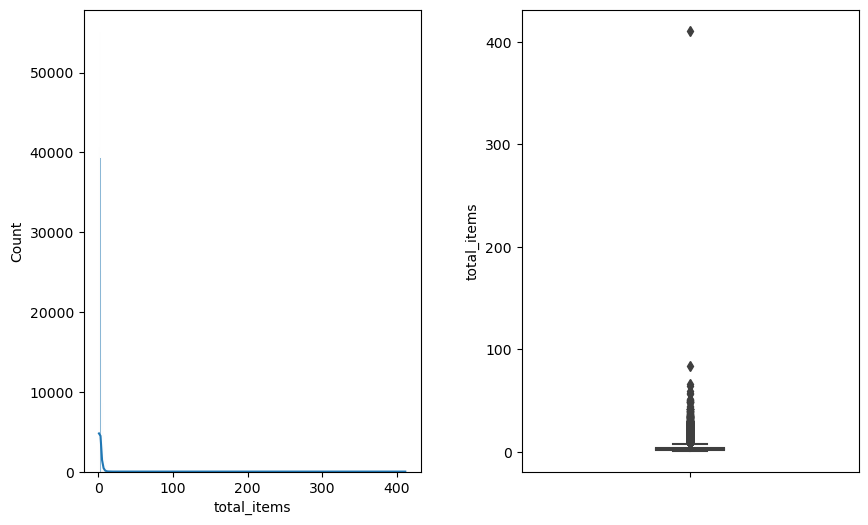

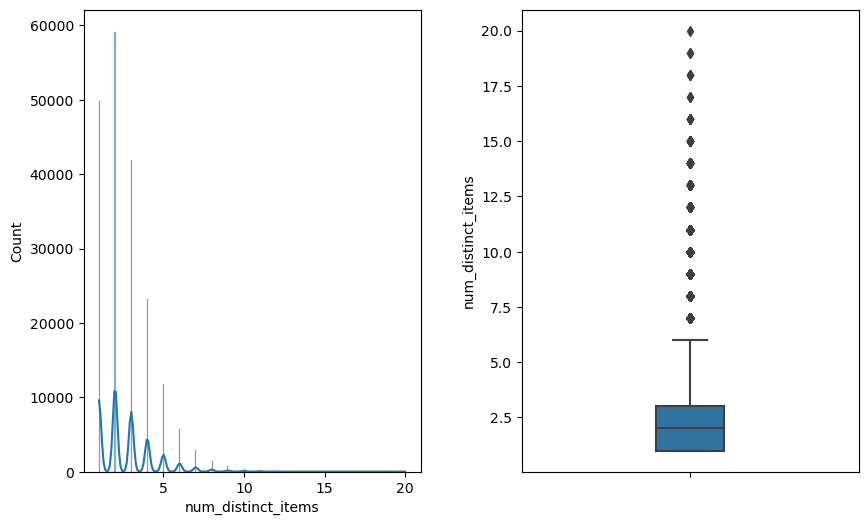

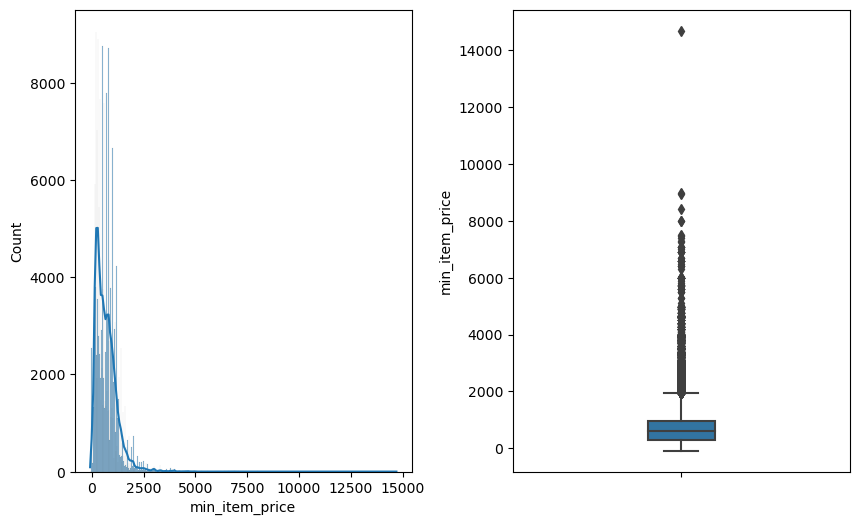

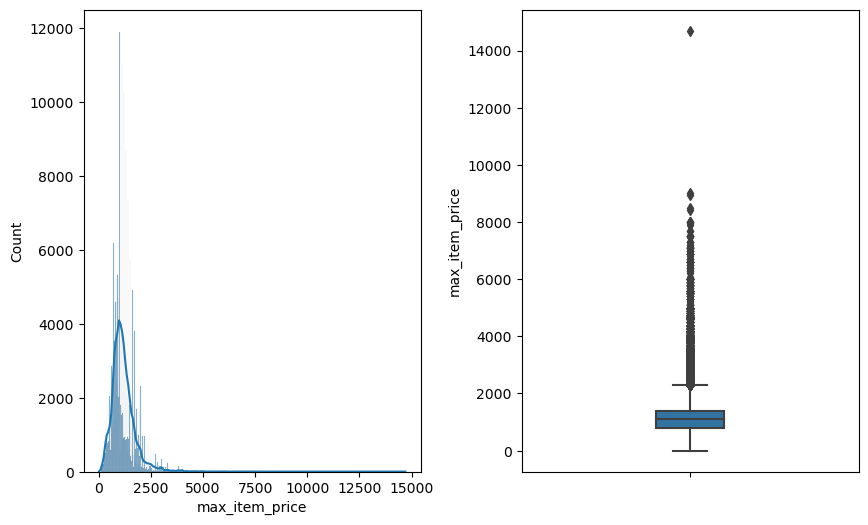

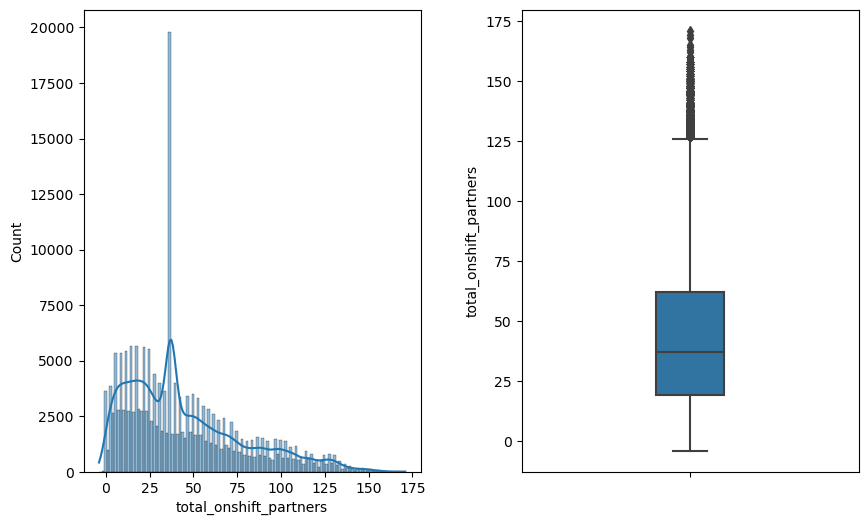

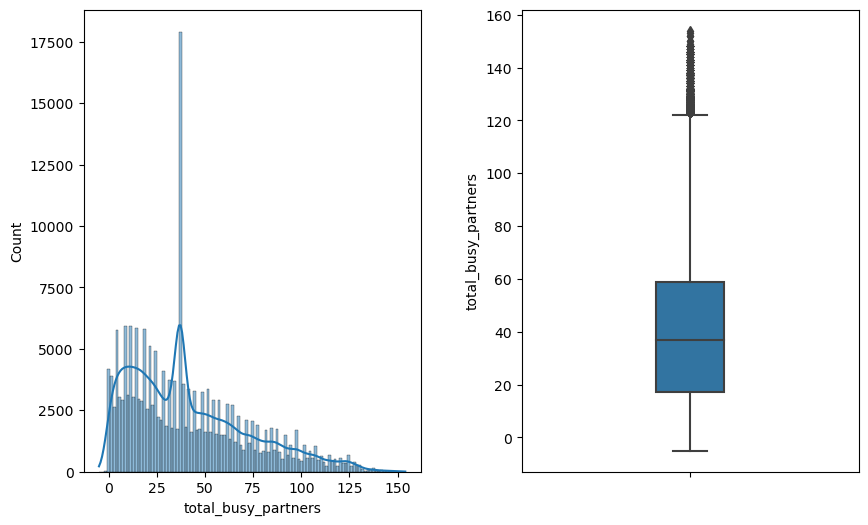

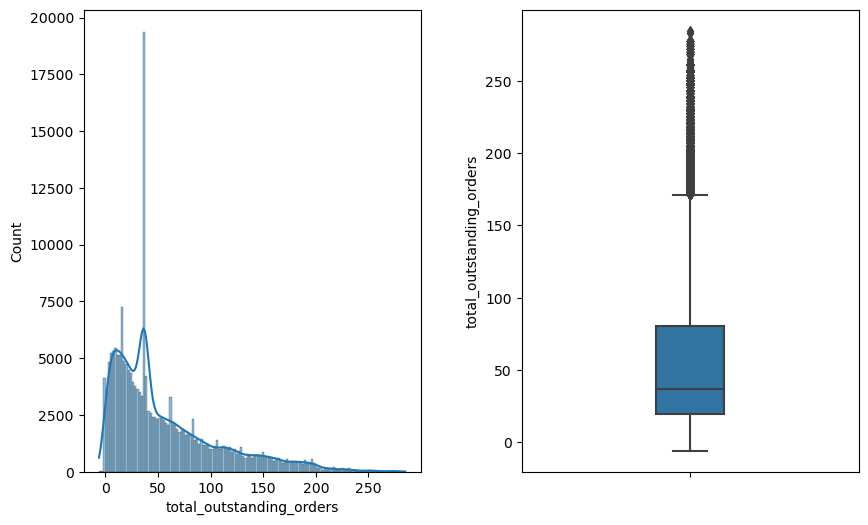

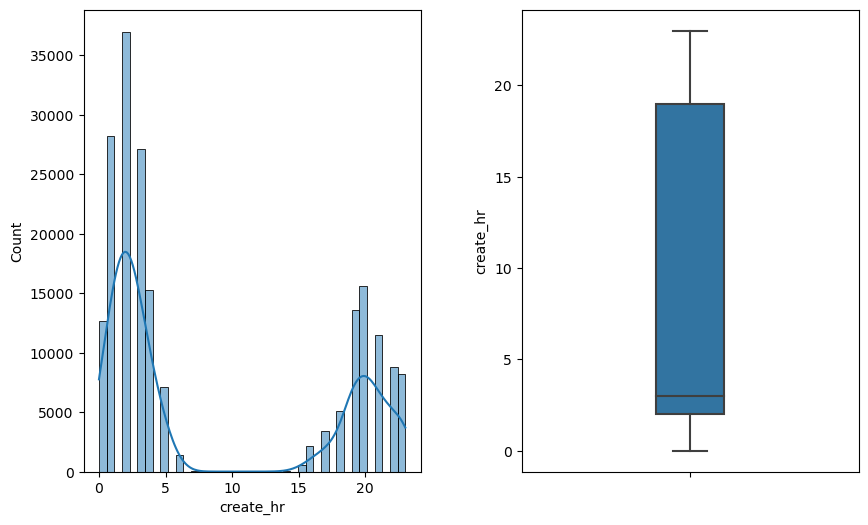

In [ ]:
num_cols=df.describe(include=['float64','int64']).columns
num_cols = num_cols.drop(['market_id','order_protocol'])

for col in num_cols:
    if df[col].nunique() < 2999:
        plotcol(df,col)

- Graph shows presence of outliers in features   
- Outliers can effect regression lines, making the regression lines less accurate in predicting.

In [ ]:
df['total_items'].value_counts(normalize=True,sort=False,bins=[0,10,500]).round(4)*100

(-0.001, 10.0]   98.28
(10.0, 500.0]     1.72
Name: total_items, dtype: float64

-  98% of total_items is less than 10

In [ ]:
df['subtotal'].value_counts(normalize=True,sort=False,bins=[0,10000,35000]).round(4)*100

(-0.001, 10000.0]    99.23
(10000.0, 35000.0]    0.77
Name: subtotal, dtype: float64

-  99% of subtotal is less than 10,000

In [ ]:
df['num_distinct_items'].value_counts(normalize=True,sort=False,bins=[0,8,25]).round(4)*100

(-0.001, 8.0]   99.20
(8.0, 25.0]      0.80
Name: num_distinct_items, dtype: float64

-  99% of num_distinct_items is less than 8   

In [ ]:
df['min_item_price'].value_counts(normalize=True,sort=False,bins=[0,2500,25000]).round(4)*100

(-0.001, 2500.0]    99.04
(2500.0, 25000.0]    0.96
Name: min_item_price, dtype: float64

-  99% of min_item_price is less than 2500   

In [ ]:
df['max_item_price'].value_counts(normalize=True,sort=False,bins=[0,3000,25000]).round(4)*100

(-0.001, 3000.0]    98.91
(3000.0, 25000.0]    1.09
Name: max_item_price, dtype: float64

-  99% of max_item_price is less than 3000   

In [ ]:
 df['total_onshift_partners'].describe()

count   197428.00
mean        44.16
std         33.14
min         -4.00
25%         19.00
50%         37.00
75%         62.00
max        171.00
Name: total_onshift_partners, dtype: float64

-  median of total_onshift_partners is 37

In [ ]:
 df['total_busy_partners'].describe()

count   197428.00
mean        41.35
std         30.82
min         -5.00
25%         17.00
50%         37.00
75%         59.00
max        154.00
Name: total_busy_partners, dtype: float64

-  median of total_busy_partners is 34

In [ ]:
 df['total_outstanding_orders'].describe()

count   197428.00
mean        56.32
std         50.78
min         -6.00
25%         19.00
50%         37.00
75%         80.00
max        285.00
Name: total_outstanding_orders, dtype: float64

-  median of total_outstanding_orders is 41

###  3.1.2 target variable

In [ ]:
df['delivery_time'].describe()

count   197421.00
mean        48.47
std        320.49
min          1.68
25%         35.07
50%         44.33
75%         56.35
max     141947.65
Name: delivery_time, dtype: float64

In [ ]:
df['delivery_time'].value_counts(normalize=True,sort=False,bins=[1,10,30,50,70,100,500,1000]).round(4)*100

(0.999, 10.0]      0.01
(10.0, 30.0]      13.14
(30.0, 50.0]      50.24
(50.0, 70.0]      26.23
(70.0, 100.0]      8.83
(100.0, 500.0]     1.54
(500.0, 1000.0]    0.01
Name: delivery_time, dtype: float64

 - 76% of delivery is made between 30 to 70 minutes

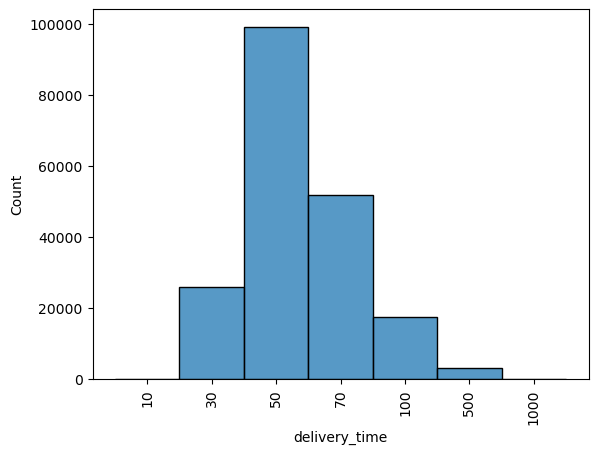

In [ ]:
bins = [1,10,30,50,70,100,500,1000]
groups = ['10','30','50','70','100','500','1000']
cr_bin=pd.cut(df['delivery_time'],bins,labels = groups)
sns.histplot(cr_bin.sort_values())
plt.xticks(rotation=90)
plt.show()

## 3.2 Categorical Columns

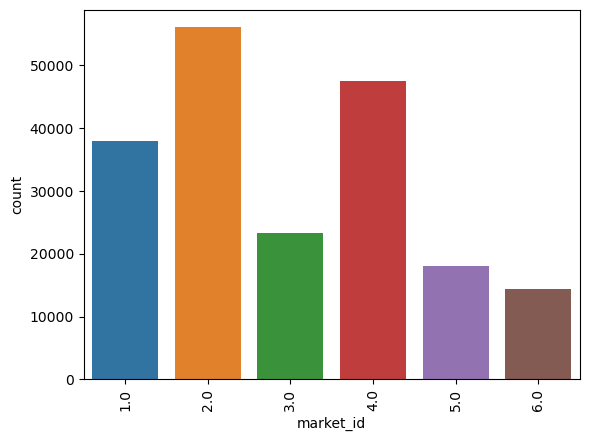

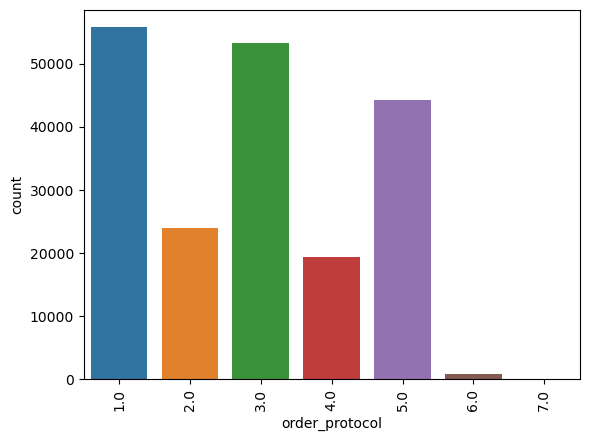

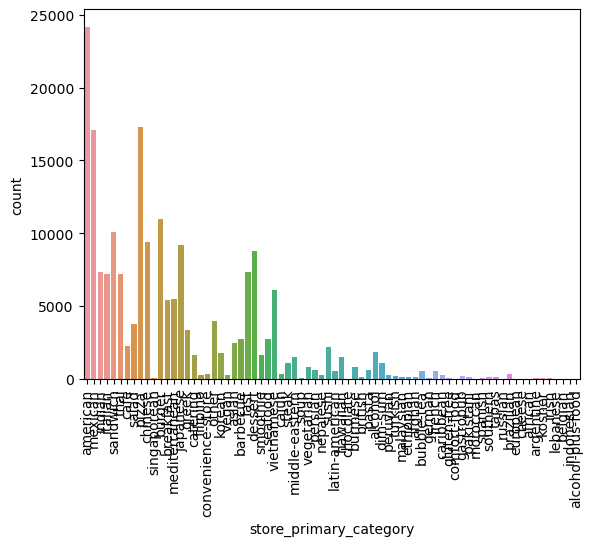

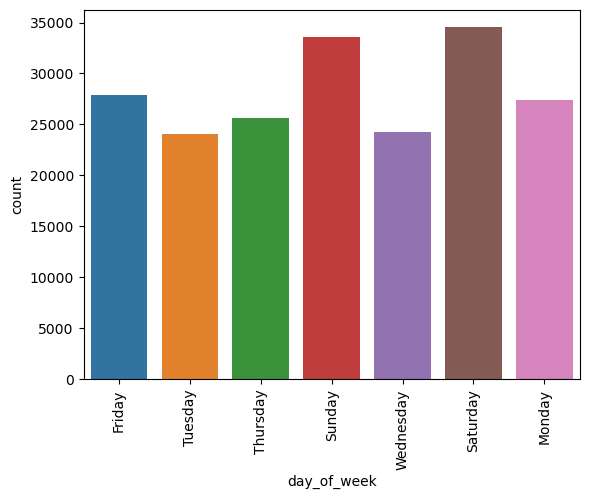

In [ ]:
cat_cols = ['market_id','order_protocol','store_primary_category','day_of_week']

for col in cat_cols:
    sns.countplot(data=df,x=col)
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
df['market_id'].value_counts(normalize=True,sort=True).round(4)*100

2.00   28.39
4.00   24.11
1.00   19.27
3.00   11.80
5.00    9.12
6.00    7.32
Name: market_id, dtype: float64

In [ ]:
df['order_protocol'].value_counts(normalize=True,sort=True).round(4)*100

1.00   28.22
3.00   26.95
5.00   22.43
2.00   12.18
4.00    9.80
6.00    0.40
7.00    0.01
Name: order_protocol, dtype: float64

In [ ]:
df['day_of_week'].value_counts(normalize=True,sort=True).round(4)*100

Saturday    17.50
Sunday      17.03
Friday      14.12
Monday      13.88
Thursday    13.00
Wednesday   12.28
Tuesday     12.19
Name: day_of_week, dtype: float64

 - 48.5 % of orders are on weekends

In [ ]:
#top 10 categories
df['store_primary_category'].value_counts(normalize=True).head(10).round(4)*100

american   12.24
pizza       8.77
mexican     8.66
burger      5.55
sandwich    5.10
chinese     4.77
japanese    4.66
dessert     4.44
fast        3.73
indian      3.70
Name: store_primary_category, dtype: Float64

Top 3 categories are :     



| Category | % |       
|:-------|-------:|     
| american  | 12.24|   
| pizza     |  8.77|   
| mexican    | 8.66|   

## 3.3 datetime Columns

In [ ]:
def plotdt(df,col):
    '''
    function to plot histogram,box plot for column
    '''
    fig, ax = plt.subplots(1,2, figsize=(10, 6))
    sns.histplot(data=df,x=col,kde='True',ax=ax[0])
    ax[0].tick_params(axis='x', rotation=90)
    sns.boxplot(y=df[col].astype(int),width=0.2,ax=ax[1])
    plt.subplots_adjust(wspace=0.3)
    plt.show()

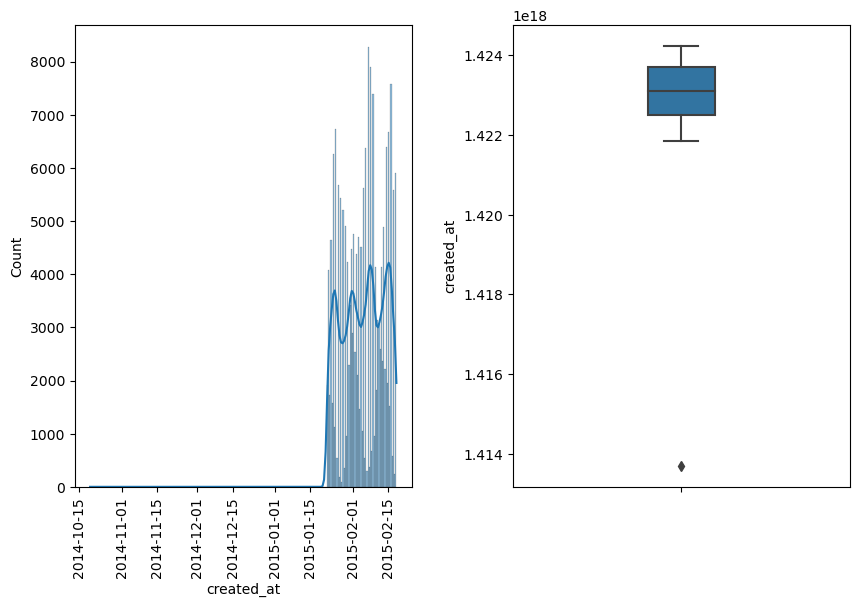

In [ ]:
plotdt(df,'created_at')

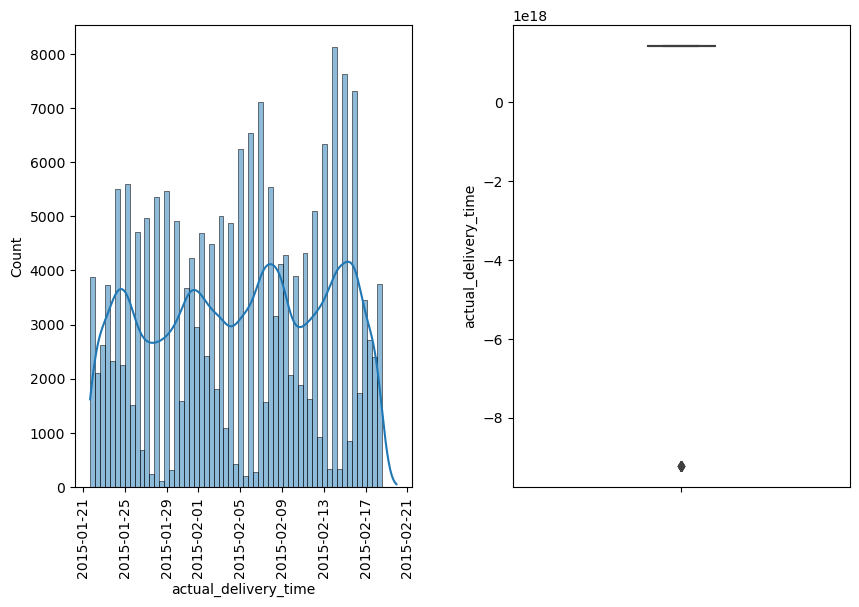

In [ ]:
plotdt(df,'actual_delivery_time')

## 3.4 Correlation Analysis

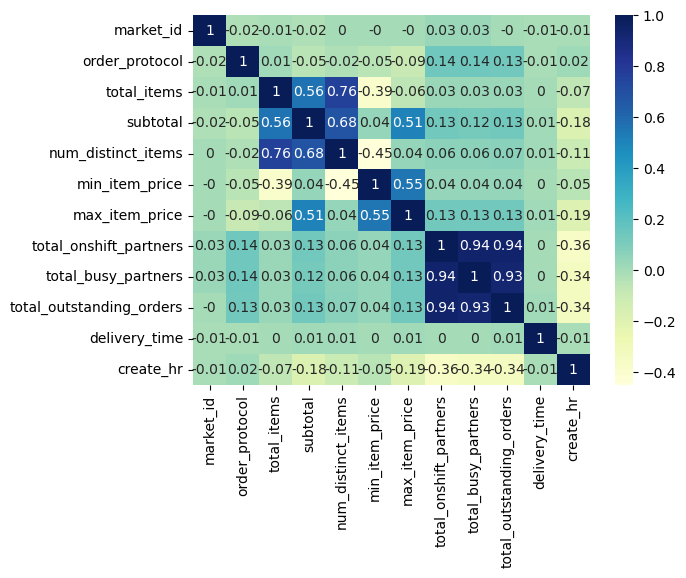

In [ ]:
# plotting correlation heatmap
dataplot = sns.heatmap(df.corr().round(2), cmap="YlGnBu", annot=True)

Above plot show correlation between  
 - total_items, num_distinct_items   
 - total_onshift_partners, total_busy_partners
 - total_onshift_partners, total_outstanding_orders

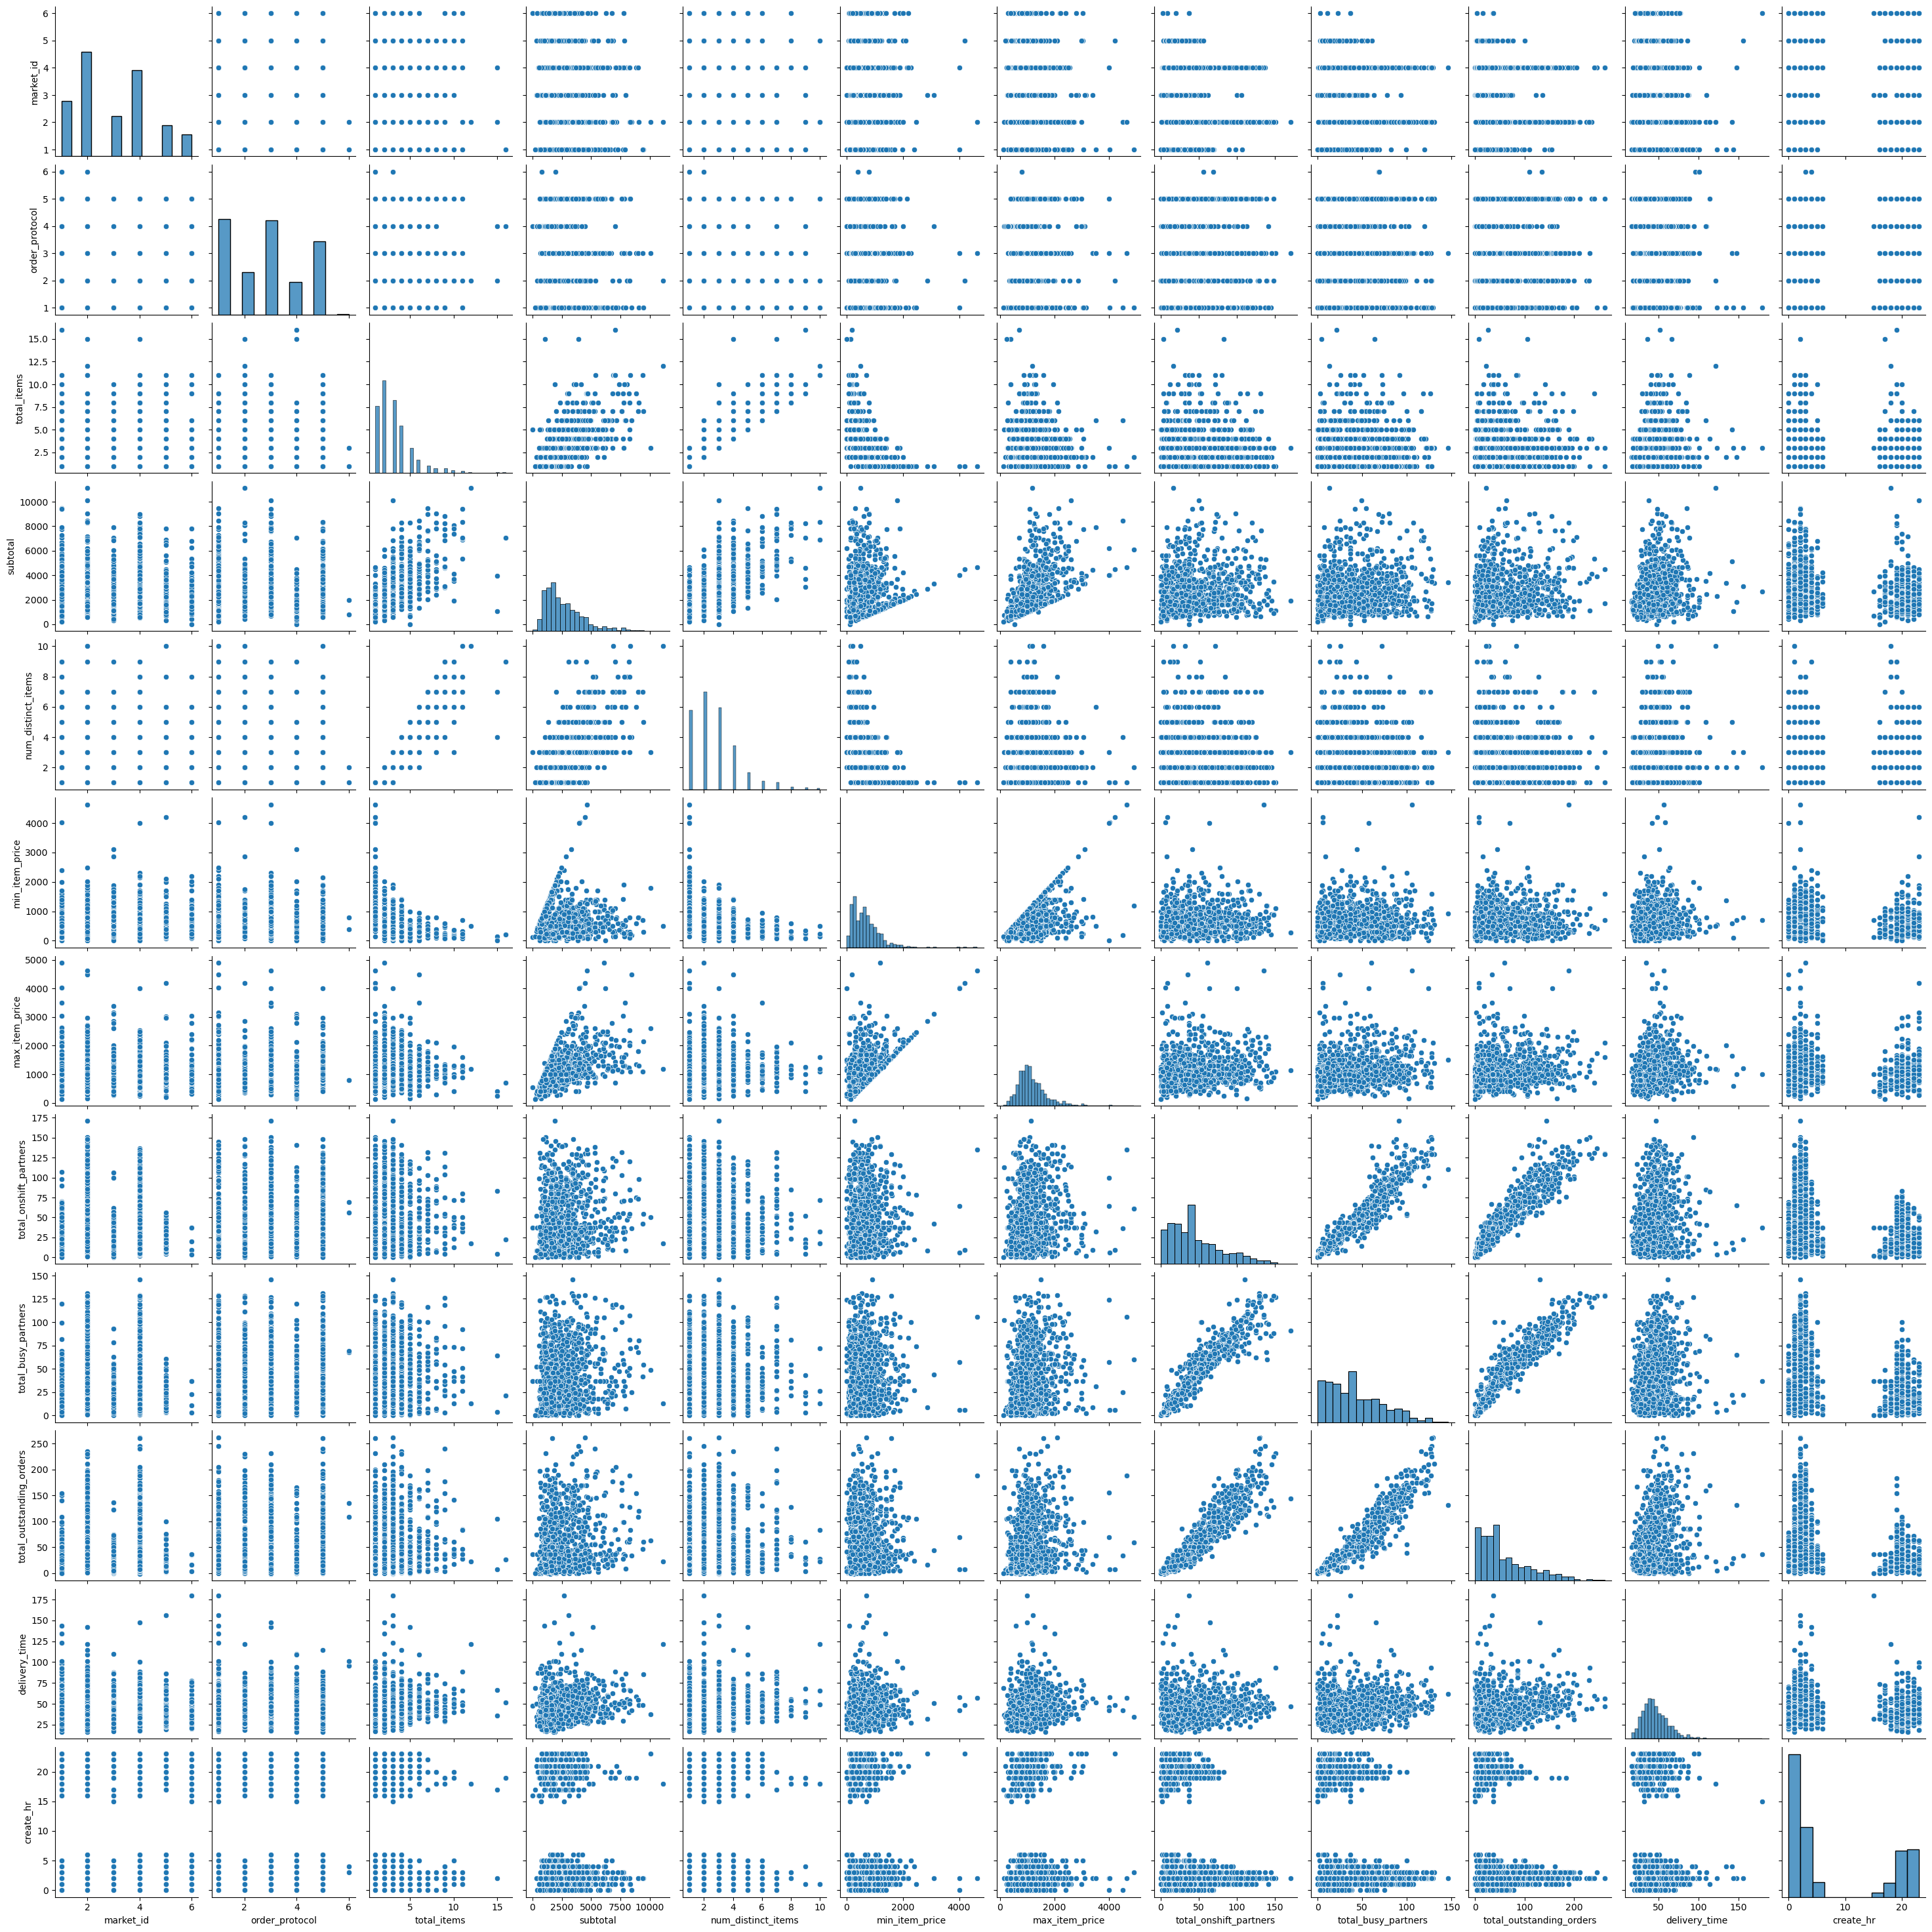

In [ ]:
sns.pairplot(df.sample(1000))
plt.show()

##  3.5 Outlier treatment

The outlier removal methods are
- IQR method
- 3sigma method
- percentile method

 Outliers can effect regression lines, making the regression lines less accurate in predicting. so they need to be removed

In [ ]:
num_cols=df.describe(include=['float64','int64']).columns
num_cols = num_cols.drop(['market_id','order_protocol'])
num_cols

Index(['total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
       'max_item_price', 'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders', 'delivery_time', 'create_hr'],
      dtype='object')

In [ ]:
def outlier(df, col):
    '''
    remove outliers using IQR
    '''
    #calculate q1,q3
    q1 = np.percentile(df[col],25)
    q3 = np.percentile(df[col],75)
    iqr = q3-q1
    #calculate high,low limit
    hl = q3+1.5*iqr
    ll = q1-1.5*iqr
    out = df[(df[col]>ll) & (df[col]<hl)]
    num= len(out)
    diff = len(df) - num
    cnt_per=(num*100)/len(df)
    print(f'col: {col} | filtered %: {round(100-cnt_per,2)}|outlier count:{diff}')
    return out

In [ ]:
for col in num_cols:
    outlier(df, col)

col: total_items | filtered %: 7.4|outlier count:14611
col: subtotal | filtered %: 4.59|outlier count:9054
col: num_distinct_items | filtered %: 5.88|outlier count:11615
col: min_item_price | filtered %: 2.33|outlier count:4605
col: max_item_price | filtered %: 3.91|outlier count:7729
col: total_onshift_partners | filtered %: 2.36|outlier count:4661
col: total_busy_partners | filtered %: 1.63|outlier count:3211
col: total_outstanding_orders | filtered %: 4.31|outlier count:8507
col: delivery_time | filtered %: 100.0|outlier count:197428
col: create_hr | filtered %: 0.0|outlier count:0


In [ ]:
def std_outlier(df, col):
    '''
    remove outliers using 3 sigma
    '''
    #calculate high,low limit
    hl = df[col].mean() + 3*df[col].std()
    ll = df[col].mean() - 3*df[col].std()
    out = df[(df[col]>ll) & (df[col]<hl)]
    num= len(out)
    diff = len(df) - num
    cnt_per=num*100/len(df)
    print(f'col: {col} | filtered %: {round(100-cnt_per,2)}|outlier count:{diff}')
    return out

In [ ]:
 for col in num_cols:
    std_outlier(df, col)

col: total_items | filtered %: 1.3|outlier count:2561
col: subtotal | filtered %: 1.92|outlier count:3789
col: num_distinct_items | filtered %: 1.52|outlier count:3002
col: min_item_price | filtered %: 1.4|outlier count:2763
col: max_item_price | filtered %: 1.57|outlier count:3103
col: total_onshift_partners | filtered %: 0.46|outlier count:902
col: total_busy_partners | filtered %: 0.29|outlier count:566
col: total_outstanding_orders | filtered %: 1.06|outlier count:2093
col: delivery_time | filtered %: 0.01|outlier count:10
col: create_hr | filtered %: 0.0|outlier count:0


- from above output we can observe that 3 sigma method for outliers is more effective

## 3.6 Outlier removal

In [ ]:
old_len = len(df)


for col in num_cols:
    df=std_outlier(df, col)

print(f'new shape after outlier removal:{df.shape}')
print(f'% of data removed:{100- (df.shape[0]*100/old_len)}')
print(f'outlier removal count:{old_len -df.shape[0]}')

col: market_id | filtered %: 0.0|outlier count:0
col: order_protocol | filtered %: 0.0|outlier count:0
col: total_items | filtered %: 1.3|outlier count:2561
col: subtotal | filtered %: 1.8|outlier count:3508
col: num_distinct_items | filtered %: 1.58|outlier count:3018
col: min_item_price | filtered %: 1.42|outlier count:2680
col: max_item_price | filtered %: 1.18|outlier count:2185
col: total_onshift_partners | filtered %: 0.46|outlier count:848
col: total_busy_partners | filtered %: 0.24|outlier count:445
col: total_outstanding_orders | filtered %: 0.92|outlier count:1667
col: delivery_time | filtered %: 0.01|outlier count:10
col: create_hr | filtered %: 0.0|outlier count:0
new shape after outlier removal:(180506, 17)
% of data removed:8.571225965921755
outlier removal count:16922


In [ ]:
df.to_csv('clean.csv', index=False)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/scaler/clean.csv')

# 4.0 Data preparation

## 4.1 separate into independent & dependent data

In [ ]:
X = df.drop(['created_at','actual_delivery_time','delivery_time'], axis=1)
Y = df[['delivery_time']]

## 4.2 Feature Encoding  

In [ ]:
le_store_id = LabelEncoder()
X['store_id'] = le_store_id.fit_transform(X['store_id'])

le_store_primary_category = LabelEncoder()
X['store_primary_category'] = le_store_primary_category.fit_transform(X['store_primary_category'])

le_day_of_week = LabelEncoder()
X['day_of_week'] = le_day_of_week.fit_transform(X['day_of_week'])

## 4.2 split data into Train ,Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state = 42)

## 4.3 Feature Scaling

In [ ]:
std=StandardScaler()

X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

Feature scaling is important in neural network so that all features get the same weightage

# 5.0 Model training with Random Forest

The classical ML regression algorithms are  
- Linear Regression
- Support Vector Regression  
- Decision tree regression
- Ridge Regression
- Lasso Regression

regression algorithms can be used for a variety of tasks, like predicting house prices, stock prices, or customer churn rates

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#https://stackoverflow.com/questions/43590489/gridsearchcv-random-forest-regressor-tuning-best-params
from sklearn.model_selection import GridSearchCV

rf_tune = RandomForestRegressor(random_state = 42)
param_grid = { 'n_estimators': [100, 150] }
grid = GridSearchCV(rf_tune, param_grid=param_grid, cv=3)
grid.fit(X_train, y_train.values.ravel())
grid.best_score_ , grid.best_params_

(0.19650876340071285, {'n_estimators': 150})

In [ ]:
# training data fit with best parms
rfr = RandomForestRegressor(n_estimators=150,
                            random_state=42)
rfr.fit(X_train_std, y_train.values.ravel())

RandomForestRegressor(n_estimators=150, random_state=42)

In [ ]:
y_pred_rf = rfr.predict(X_test_std)

In [ ]:
mae = met.mean_absolute_error(y_test, y_pred_rf)
mse = met.mean_squared_error(y_test, y_pred_rf)
r2 = met.r2_score(y_test, y_pred_rf)
print(f'mae:{mae}')
print(f'mse:{mse}')
print(f'rmse:{np.sqrt(mse)}')
print(f'r2 :{r2}')

mae:11.517263478570467
mse:277.8602294504913
rmse:16.669140033321796
r2 :0.22317904875452144


# 6.0 Model training with Neural Network

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

- input layer has same dimension as the number of features
- output layer for regression has single neuron with linear activation  
-  neural networks hidden layers have relu activation
- Adam is best optimizer for neural network

In [ ]:
#https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw
def create_model():
    model = Sequential([
                    Dense(14, activation="relu", input_shape=(14,), name="hidden_1"),
                    Dense(4, activation="relu", name="hidden_2"),
                    Dense(1,  name="output")])
    model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mse','mae'],
    loss = 'mean_squared_error')
    return model

model = create_model()

In [ ]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_1 (Dense)            (None, 14)                210       
                                                                 
 hidden_2 (Dense)            (None, 4)                 60        
                                                                 
 output (Dense)              (None, 1)                 5         
                                                                 
Total params: 275
Trainable params: 275
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit( X_train_std, y_train.values.ravel(),
            validation_split=0.2,batch_size=256,
            verbose=1, epochs=20)

Epoch 1/20
452/452 [==============================] - 3s 4ms/step - loss: 1745.3071 - mse: 1745.3071 - mae: 35.8468 - val_loss: 587.8555 - val_mse: 587.8555 - val_mae: 17.0154
Epoch 2/20
452/452 [==============================] - 1s 2ms/step - loss: 456.2302 - mse: 456.2302 - mae: 15.0786 - val_loss: 426.5226 - val_mse: 426.5226 - val_mae: 14.2892
Epoch 3/20
452/452 [==============================] - 1s 3ms/step - loss: 390.6828 - mse: 390.6828 - mae: 13.8189 - val_loss: 382.9645 - val_mse: 382.9645 - val_mae: 13.3677
Epoch 4/20
452/452 [==============================] - 1s 2ms/step - loss: 354.3187 - mse: 354.3187 - mae: 13.0301 - val_loss: 355.7436 - val_mse: 355.7436 - val_mae: 12.7393
Epoch 5/20
452/452 [==============================] - 1s 2ms/step - loss: 334.6385 - mse: 334.6385 - mae: 12.5825 - val_loss: 343.9742 - val_mse: 343.9742 - val_mae: 12.4464
Epoch 6/20
452/452 [==============================] - 1s 2ms/step - loss: 326.3986 - mse: 326.3986 - mae: 12.3986 - val_loss: 33

In [ ]:
y_pred = model.predict(X_test_std)

1129/1129 [==============================] - 1s 1ms/step


In [ ]:
mae = met.mean_absolute_error(y_test, y_pred)
mse = met.mean_squared_error(y_test, y_pred)
r2 = met.r2_score(y_test, y_pred)
print(f'mae:{mae}')
print(f'mse:{mse}')
print(f'rmse:{np.sqrt(mse)}')
print(f'r2 :{r2}')

mae:11.928252554180206
mse:296.82679587964816
rmse:17.228662045546315
r2 :0.1701537338165181


In [ ]:
epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]

mae = history.history["mae"]
val_mae = history.history["val_mae"]

mse = history.history["mse"]
val_mse = history.history["val_mse"]

In [ ]:
 def plot_graph(epochs,k1,k2):
  plt.figure()
  plt.plot(epochs, k1, label="train")
  plt.plot(epochs, k2, label="val")
  plt.legend()
  plt.show()


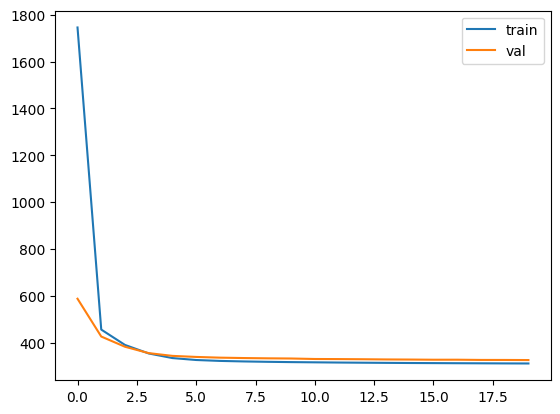

In [ ]:
plot_graph(epochs,loss,val_loss)

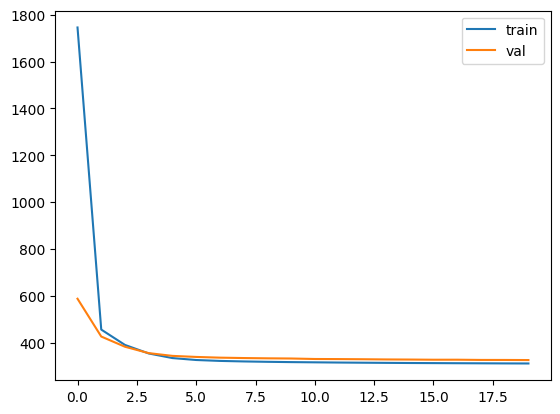

In [ ]:
plot_graph(epochs,mse,val_mse)

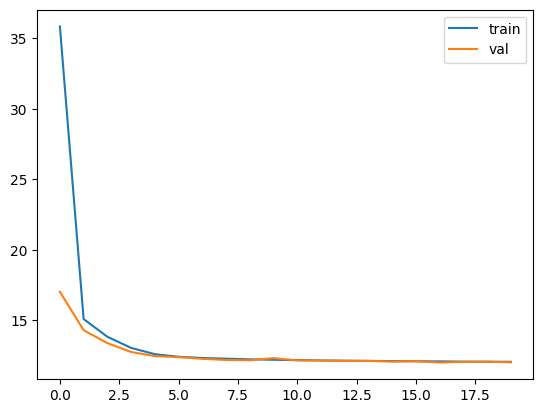

In [ ]:
plot_graph(epochs,mae,val_mae)

### Advantage of Neural Network regressor
- capture non-linear relationship between input and output  
- robust to noise and outliers
- automatically learn features from input data  
- scalable for large data
- generalize well to unseen data  